In [113]:
import pandas
import os
import matplotlib.pyplot as plt
import random
import kagglehub
import pandas as pd


#path = kagglehub.dataset_download("shakthisairam123/gym-workout-imu-dataset")
path = "data"

In [114]:
#checking data without filtering
data = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        data.append(pd.read_csv(os.path.join(dirname, filename)))

print(data[0].keys())
data[0].head()



Index(['secondsElapsed', 'wristMotion_rotationRateX',
       'wristMotion_rotationRateY', 'wristMotion_rotationRateZ',
       'wristMotion_gravityX', 'wristMotion_gravityY', 'wristMotion_gravityZ',
       'wristMotion_accelerationX', 'wristMotion_accelerationY',
       'wristMotion_accelerationZ', 'wristMotion_quaternionW',
       'wristMotion_quaternionX', 'wristMotion_quaternionY',
       'wristMotion_quaternionZ', 'weight', 'set', 'reps', 'activity',
       'activityEncoded'],
      dtype='object')


,secondsElapsed,wristMotion_rotationRateX,wristMotion_rotationRateY,wristMotion_rotationRateZ,wristMotion_gravityX,wristMotion_gravityY,wristMotion_gravityZ,wristMotion_accelerationX,wristMotion_accelerationY,wristMotion_accelerationZ,wristMotion_quaternionW,wristMotion_quaternionX,wristMotion_quaternionY,wristMotion_quaternionZ,weight,set,reps,activity,activityEncoded
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,15.0,CGCR,2
1,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,15.0,CGCR,2
2,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,15.0,CGCR,2
3,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,15.0,CGCR,2
4,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,15.0,CGCR,2


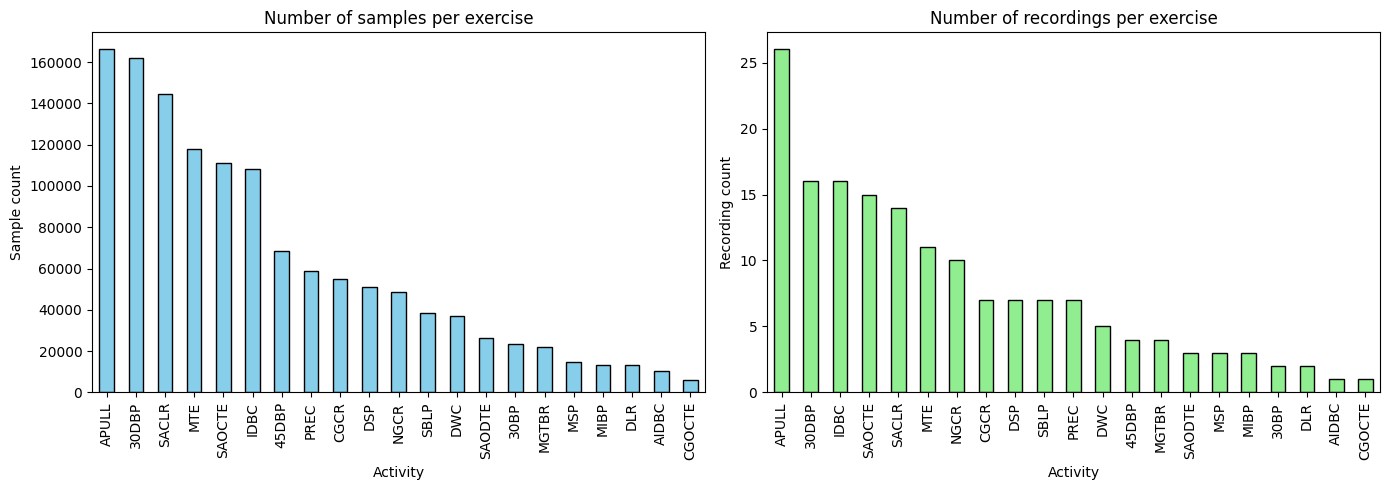

In [115]:
def plots():
    all_data = pd.concat(data, ignore_index=True)

    sample_counts = all_data["activity"].value_counts()
    recording_counts = pd.Series([df["activity"].iloc[0] for df in data]).value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(14,5))
    
    # Samples per exercise(How many data points each exercise has)
    sample_counts.plot(kind="bar", ax=axes[0], color="skyblue", edgecolor="black")
    axes[0].set_title("Number of samples per exercise")
    axes[0].set_xlabel("Activity")
    axes[0].set_ylabel("Sample count")
    axes[0].tick_params(axis="x", rotation=90)
    
    # Recordings per execise(How many times exercise was done)
    recording_counts.plot(kind="bar", ax=axes[1], color="lightgreen", edgecolor="black")
    axes[1].set_title("Number of recordings per exercise")
    axes[1].set_xlabel("Activity")
    axes[1].set_ylabel("Recording count")
    axes[1].tick_params(axis="x", rotation=90)
    
    plt.tight_layout()
    plt.show()
    
plots()

    

In [116]:
#first and last values are empty for each file, also only used will be gyroscope and accelerometer data, everything else is dropped here
def filter_data(df):
    df_filtered = df.copy()
    min_time = df_filtered["secondsElapsed"].min() + 1.5
    max_time = df_filtered["secondsElapsed"].max() - 1.5
    df_filtered = df_filtered[(df_filtered["secondsElapsed"] >= min_time) & (df_filtered["secondsElapsed"] <= max_time)].reset_index(drop=True)
    df_filtered = df_filtered.drop(
    columns=[
        "wristMotion_gravityX",
        "wristMotion_gravityY",
        "wristMotion_gravityZ",
        "wristMotion_quaternionW",
        "wristMotion_quaternionX",
        "wristMotion_quaternionY",
        "wristMotion_quaternionZ",
        #"weight",
        #"set",
        #"reps",
        #"activity",
        #"activityEncoded",
    ],
    errors="ignore"
    )
    return df_filtered


# Smooth noisy sensor signals using a moving average.
def smooth_columns(df, window):
    df_smoothed = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df_smoothed[col] = df[col].rolling(window=window, center=True).mean()
    return df_smoothed



In [117]:
#loading data with filtering
data = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        data.append(filter_data(pd.read_csv(os.path.join(dirname, filename))))

print(data[0].keys())
data[0].head()

#time, rotations(X,Y,Z), acceleration(X,Y,Z), 'weight', 'set', 'reps', 'activity', 'activityEncoded'

Index(['secondsElapsed', 'wristMotion_rotationRateX',
       'wristMotion_rotationRateY', 'wristMotion_rotationRateZ',
       'wristMotion_accelerationX', 'wristMotion_accelerationY',
       'wristMotion_accelerationZ', 'weight', 'set', 'reps', 'activity',
       'activityEncoded'],
      dtype='object')


,secondsElapsed,wristMotion_rotationRateX,wristMotion_rotationRateY,wristMotion_rotationRateZ,wristMotion_accelerationX,wristMotion_accelerationY,wristMotion_accelerationZ,weight,set,reps,activity,activityEncoded
0,1.50,-0.061832,0.058511,-0.396635,-0.007918,-0.020703,0.127272,52.0,1.0,15.0,CGCR,2
1,1.51,-0.096134,0.100556,-0.369328,-0.005046,-0.020252,0.095891,52.0,1.0,15.0,CGCR,2
2,1.52,-0.119525,0.126381,-0.348870,-0.002349,-0.014771,0.062483,52.0,1.0,15.0,CGCR,2
3,1.53,-0.128653,0.148439,-0.338229,-0.002604,-0.012126,0.036678,52.0,1.0,15.0,CGCR,2
4,1.54,-0.134545,0.167622,-0.329749,-0.010524,-0.012318,0.009677,52.0,1.0,15.0,CGCR,2


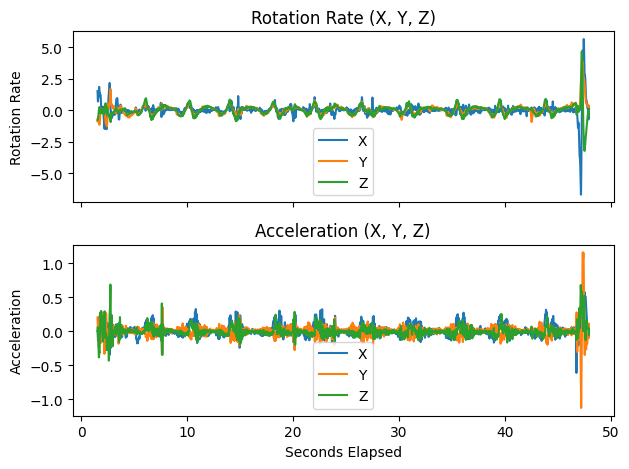

In [118]:
#Checking random sample
n = random.randint(0, len(data) - 1)
df = data[n]

df = smooth_columns(df, 5)

fig, axes = plt.subplots(2,1,sharex = True)

#gyroscope data
axes[0].plot(df["secondsElapsed"], df["wristMotion_rotationRateX"], label="X")
axes[0].plot(df["secondsElapsed"], df["wristMotion_rotationRateY"], label="Y")
axes[0].plot(df["secondsElapsed"], df["wristMotion_rotationRateZ"], label="Z")
axes[0].set_ylabel("Rotation Rate")
axes[0].set_title("Rotation Rate (X, Y, Z)") 
axes[0].legend()

#accelerometer data
axes[1].plot(df["secondsElapsed"], df["wristMotion_accelerationX"], label="X")
axes[1].plot(df["secondsElapsed"], df["wristMotion_accelerationY"], label="Y")
axes[1].plot(df["secondsElapsed"], df["wristMotion_accelerationZ"], label="Z")
axes[1].set_ylabel("Acceleration")
axes[1].set_xlabel("Seconds Elapsed")
axes[1].set_title("Acceleration (X, Y, Z)")
axes[1].legend()

plt.tight_layout()
plt.show()

Label encoding

In [119]:
#Gives each activity ID
all_activities = pd.concat([df['activity'] for df in data], ignore_index=True)

#activity mapping
categories = all_activities.astype("category").cat.categories
activity_to_id = {cat: idx for idx, cat in enumerate(categories)}

print(activity_to_id)
#gives new column activity encoded to each df
for i, df in enumerate(data):
    df["activityEncoded"] = df["activity"].map(activity_to_id)
    data[i] = df

{'30BP': 0, '30DBP': 1, '45DBP': 2, 'AIDBC': 3, 'APULL': 4, 'CGCR': 5, 'CGOCTE': 6, 'DLR': 7, 'DSP': 8, 'DWC': 9, 'IDBC': 10, 'MGTBR': 11, 'MIBP': 12, 'MSP': 13, 'MTE': 14, 'NGCR': 15, 'PREC': 16, 'SACLR': 17, 'SAOCTE': 18, 'SAODTE': 19, 'SBLP': 20}


In [120]:
imu_features = [
    "wristMotion_rotationRateX", "wristMotion_rotationRateY", "wristMotion_rotationRateZ",
    "wristMotion_accelerationX", "wristMotion_accelerationY", "wristMotion_accelerationZ"
]

In [121]:
import numpy as np

#checking for NaN in data
for i, df in enumerate(data):
    df[imu_features] = df[imu_features].fillna(0).replace([np.inf, -np.inf], 0)
    data[i] = df
        

In [122]:
import torch

#Selcet Gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [123]:
def preprocess_sample(window ,y, smooth_kernel=5, downsample_factor=2, downsample_mode="avg"):

    X = window.astype(np.float32)

    #1. Creates a smoothing kernel
    if smooth_kernel and smooth_kernel > 1:
        k = int(smooth_kernel)
        if k % 2 == 0:
             k += 1 #enforce odd

        kernel = np.ones(k, dtype=np.float32) / k
        X = np.vstack([
            np.convolve(X[:, f], kernel, mode="same")
            for f in range(X.shape[1])
        ]).T.astype(np.float32)


    #TODO check downsampling
    # 
    
    #2. Downsample
    if downsample_factor and downsample_factor > 1:
        d = int(downsample_factor)
        if downsample_mode == "avg":
            T, F = X.shape
            # pad to make T divisible by d (repeat last row)
            pad_needed = (-T) % d
            if pad_needed:
                X = np.concatenate([X, np.repeat(X[-1:, :], pad_needed, axis=0)], axis=0)
            X = X.reshape(-1, d, F).mean(axis=1)
        else:  # "slice"
            X = X[::d]

    return X, y


In [124]:
from torch.utils.data import Dataset

class IMUDataset(Dataset):
    def __init__(self, dataframes, features, window_size=300, step_size=150,
                 preprocess_fn=None, preprocess_kwargs=None):
        """
        dataframes: list of pandas DataFrames
        features: list of feature column names to use
        window_size: number of timesteps per window (e.g. 300 = 3s at 100Hz)
        step_size: overlap between windows (e.g. 150 = 50% overlap)
        """
        self.samples = []
        self.preprocess_fn = preprocess_fn
        self.preprocess_kwargs = preprocess_kwargs or {}

        for df in dataframes: #each file is a dataframe 
            X = df[features].values #X values for one dataframe
            y = int(df["activityEncoded"].iloc[0])  # same label for the whole sequence

            for start in range(0, len(X) - window_size + 1, step_size):
                end = start + window_size
                window = X[start:end]


                #What is happening here?
                if self.preprocess_fn is not None:
                    window, y_out = self.preprocess_fn(window, y, **self.preprocess_kwargs) #applying preprocessing function
                    y_use = y_out #preprocessed
                else:
                    y_use = y #not preprocessed

                self.samples.append((window, y_use)) #appending every window + corresponding activity

    def __len__(self):
        return len(self.samples) #number of windows gathered

    def __getitem__(self, idx):
        X, y = self.samples[idx]
        X = torch.tensor(X, dtype=torch.float32)  # (window_size, num_features)
        y = torch.tensor(y, dtype=torch.long)     # Class
        return X, y

Implementing StratifiedShuffleSplit
Dont understand this part
Used for dividing train/test for time series data

In [125]:

from sklearn.model_selection import StratifiedShuffleSplit
import warnings

window_size = 300                 # timesteps per window 
step_size = 30                   # overlap between windows 
train_split = 0.8


#What is happening here?
session_labels = np.array([int(df["activityEncoded"].iloc[0]) for df in data])
n_sessions = len(data)
target_train = int(train_split * n_sessions)

def stratified_session_split(data, labels, train_ratio=0.8, seed=42):
    labels = np.asarray(labels)
    idx_all = np.arange(len(labels))

    # Classes with only 1 session cannot be stratified -> force them into TRAIN
    _, counts = np.unique(labels, return_counts=True)
    cls_counts = dict(zip(*np.unique(labels, return_counts=True)))
    rare_classes = {c for c, k in cls_counts.items() if k < 2}

    forced_train_idx = np.array([i for i in idx_all if labels[i] in rare_classes], dtype=int)
    rest_idx = np.array([i for i in idx_all if labels[i] not in rare_classes], dtype=int)

    if len(rest_idx) == 0:
        warnings.warn("All classes are rare (count<2). Putting all sessions in TRAIN.")
        return forced_train_idx, np.array([], dtype=int)

    # Desired train size for the remaining pool
    remaining_train_needed = max(0, target_train - len(forced_train_idx))
    remaining_total = len(rest_idx)

    if remaining_total == 0 or remaining_train_needed == 0:
        train_idx = forced_train_idx
        test_idx = np.setdiff1d(idx_all, train_idx, assume_unique=False)
        return np.sort(train_idx), np.sort(test_idx)

    # Compute adjusted test_size for the remaining pool
    adjusted_train_ratio = min(1.0, remaining_train_needed / remaining_total)
    adjusted_test_size = 1.0 - adjusted_train_ratio

    # Stratified split on the remaining pool
    sss = StratifiedShuffleSplit(n_splits=1, test_size=adjusted_test_size, random_state=seed)
    rest_labels = labels[rest_idx]
    (rest_train_sel, rest_test_sel), = sss.split(rest_idx, rest_labels)

    train_idx = np.concatenate([forced_train_idx, rest_idx[rest_train_sel]])
    test_idx  = rest_idx[rest_test_sel]

    # Safety: ensure every class present in the whole dataset appears in TRAIN
    present_all = set(np.unique(labels))
    present_train = set(np.unique(labels[train_idx]))
    missing_in_train = present_all - present_train
    if missing_in_train:
        warnings.warn(f"Some classes had too few sessions; moving one session per missing class to TRAIN: {missing_in_train}")
        for cls in list(missing_in_train):
            cand = np.where(labels[test_idx] == cls)[0]
            if len(cand) > 0:
                move = test_idx[cand[0]]
                train_idx = np.append(train_idx, move)
                test_idx = np.delete(test_idx, cand[0])

    return np.sort(train_idx), np.sort(test_idx)



# ---- use the splitter ----
train_idx, test_idx = stratified_session_split(data, session_labels, train_ratio=train_split, seed=42)
train_dfs = [data[i] for i in train_idx]
test_dfs  = [data[i] for i in test_idx]

print(f"Sessions -> train: {len(train_dfs)} | test: {len(test_dfs)}")
# Quick distribution check
test_classes = sorted({int(df['activityEncoded'].iloc[0]) for df in test_dfs})
train_classes = sorted({int(df['activityEncoded'].iloc[0]) for df in train_dfs})
missing_in_test = sorted(set(train_classes) - set(test_classes))
print(f"Train classes ({len(train_classes)}):", train_classes)
print(f"Test classes ({len(test_classes)}):", test_classes, "\nMissing in test:", missing_in_test) 

Sessions -> train: 131 | test: 33
Train classes (21): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Test classes (17): [1, 2, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
Missing in test: [0, 3, 6, 7]


In [126]:


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader


# 2) Fit scaler ONLY on TRAIN using a DataFrame 
scaler = StandardScaler()
train_stack_df = pd.concat([df.loc[:, imu_features] for df in train_dfs], ignore_index=True)
scaler.fit(train_stack_df)   

# 3) Transform in place (preserve column order and names)
for df in train_dfs:
    df.loc[:, imu_features] = scaler.transform(df.loc[:, imu_features])

for df in test_dfs:
    df.loc[:, imu_features] = scaler.transform(df.loc[:, imu_features])



# 4) Build datasets (one per split) from the pre-scaled DataFrames
train_dataset = IMUDataset(
    dataframes=train_dfs,
    features=imu_features,
    window_size=window_size,
    step_size=step_size,
    preprocess_fn=preprocess_sample,
    preprocess_kwargs=dict(smooth_kernel=5, downsample_factor=2, downsample_mode="avg")
)

test_dataset = IMUDataset(
    dataframes=test_dfs,
    features=imu_features,
    window_size=window_size,
    step_size=step_size,
    preprocess_fn=preprocess_sample,   
    preprocess_kwargs=dict(smooth_kernel=5, downsample_factor=2, downsample_mode="avg")
)

# 5) DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=1,  shuffle=False)

#what does this do?
assert set(map(id, train_dfs)).isdisjoint(set(map(id, test_dfs))), "Leak: same session in both splits"



In [127]:
print("Train dataset size:", len(train_dataset))

X, y = train_dataset[0]
print("X shape:", X.shape)   # (window_size, num_features)
print("y:", y)               # label

for X, y in train_loader:
    print("Batch X shape:", X.shape)   # (batch_size, window_size, num_features)
    print("Batch y shape:", y.shape)   # (batch_size,)
    break

#Test dataset info
print("Test dataset size:", len(test_dataset))
X, y = test_dataset[0]
print("X shape:", X.shape)   # (window_size, num_features)
print("y:", y)               # label

for X, y in test_loader:
    print("Batch X shape:", X.shape)   # (batch_size, window_size, num_features)
    print("Batch y shape:", y.shape)   # (batch_size,)
    break

Train dataset size: 31624
X shape: torch.Size([150, 6])
y: tensor(5)
Batch X shape: torch.Size([32, 150, 6])
Batch y shape: torch.Size([32])
Test dataset size: 8383
X shape: torch.Size([150, 6])
y: tensor(18)
Batch X shape: torch.Size([1, 150, 6])
Batch y shape: torch.Size([1])


Handling imblalanced data

In [128]:
from sklearn.utils.class_weight import compute_class_weight


y_train = [train_dataset[i][1].item() for i in range(len(train_dataset))]
id_to_activity = dict(enumerate(categories))


classes = np.array(sorted(id_to_activity.keys()))


class_weights_np = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)



class_weights = torch.tensor(class_weights_np, dtype=torch.float32, device='cpu')


class_counts = np.bincount(y_train, minlength=classes.max() + 1)

df_weights = pd.DataFrame({
    "Class ID": classes,
    "Activity": [id_to_activity[i] for i in classes],
    "Count": class_counts[classes],     # index by 'classes' to stay aligned
    "Weight": class_weights_np
}).sort_values("Weight", ascending=False, ignore_index=True)

print(df_weights)





    Class ID Activity  Count    Weight
0          6   CGOCTE    183  8.228988
1         12     MIBP    256  5.882440
2         13      MSP    323  4.662244
3          3    AIDBC    324  4.647854
4          7      DLR    400  3.764762
5         11    MGTBR    487  3.092207
6         19   SAODTE    532  2.830648
7          0     30BP    741  2.032260
8          9      DWC    907  1.660314
9         20     SBLP    960  1.568651
10         5     CGCR    993  1.516520
11        15     NGCR   1155  1.303814
12         8      DSP   1355  1.111369
13        16     PREC   1362  1.105657
14         2    45DBP   1905  0.790501
15        10     IDBC   2597  0.579863
16        17    SACLR   2638  0.570851
17        18   SAOCTE   2805  0.536864
18        14      MTE   3261  0.461792
19         4    APULL   4045  0.372288
20         1    30DBP   4395  0.342640


In [129]:
num_features = len(imu_features)

num_classes = len(activity_to_id)

learning_rate = 2e-4
num_epochs = 30

#model parameters
hidden_dim = 64
lstm_layers = 2

#regularization
clip_grad_norm = 1.0

loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam



In [130]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN_LSTM(nn.Module):
    def __init__(self, num_features=6, num_classes=21, hidden_dim=64, lstm_layers=1):
        super(CNN_LSTM, self).__init__()

        # CNN feature extractor
        self.conv1 = nn.Conv1d(in_channels=num_features, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(kernel_size=2)

        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(kernel_size=2)

        self.conv3 = nn.Conv1d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn3   = nn.BatchNorm1d(128)

        # LSTM
        self.lstm = nn.LSTM(
            input_size=128,
            hidden_size=hidden_dim,
            num_layers=lstm_layers,
            batch_first=True
        )

        # Classifier
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        # x: (batch, seq_len, features)
        x = x.permute(0, 2, 1)  # (batch, features, seq_len)

        # CNN
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))  # (batch, channels, seq_len//4)
        x = F.relu(self.bn3(self.conv3(x)))

        # Prepare for LSTM
        x = x.permute(0, 2, 1)  # (batch, seq_len_reduced, channels)

        # LSTM
        lstm_out, _ = self.lstm(x)  # (batch, seq_len_reduced, hidden_dim)
        out = lstm_out[:, -1, :]    # last hidden state

        # Classifier
        out = self.fc(out)
        return out

        


In [131]:
model = CNN_LSTM()

criterion = loss_fn
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



Training loop

In [132]:
for epoch in range(num_epochs):
    correct = 0
    total = 0
    running_loss = 0.0

    for X,y in train_loader:
        optimizer.zero_grad() #sets gradients to zero
        #Forward 
        outputs = model(X)
        #Loss
        loss = criterion(outputs, y)
        #Backward
        loss.backward()

        #gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        #updates parameters
        optimizer.step()

        #keeps track of loss and accuracy
        running_loss += loss.item()

        _, predicted = torch.max(outputs,dim=1)
        correct += (predicted == y).sum().item()
        total += y.size(0)

    #accuracy
    epoch_acc = 100 * correct / total if total > 0 else 0 
    avg_loss = running_loss / len(train_loader)


    print(f"Epoch {epoch}: loss={avg_loss:.4f}, accuracy={epoch_acc:.2f}%")




Epoch 0: loss=1.9124, accuracy=49.37%
Epoch 1: loss=1.0327, accuracy=66.16%
Epoch 2: loss=0.7891, accuracy=70.86%
Epoch 3: loss=0.6452, accuracy=75.75%
Epoch 4: loss=0.5374, accuracy=78.48%
Epoch 5: loss=0.4497, accuracy=81.63%
Epoch 6: loss=0.3847, accuracy=83.99%
Epoch 7: loss=0.3305, accuracy=85.64%
Epoch 8: loss=0.2937, accuracy=87.32%
Epoch 9: loss=0.2601, accuracy=88.75%
Epoch 10: loss=0.2146, accuracy=90.57%
Epoch 11: loss=0.1972, accuracy=91.54%
Epoch 12: loss=0.1839, accuracy=92.61%
Epoch 13: loss=0.1577, accuracy=93.55%
Epoch 14: loss=0.1429, accuracy=94.42%
Epoch 15: loss=0.1260, accuracy=94.95%
Epoch 16: loss=0.1197, accuracy=95.33%
Epoch 17: loss=0.1066, accuracy=95.93%
Epoch 18: loss=0.1005, accuracy=96.15%
Epoch 19: loss=0.0916, accuracy=96.55%
Epoch 20: loss=0.0833, accuracy=96.78%
Epoch 21: loss=0.0811, accuracy=97.08%


KeyboardInterrupt: 

In [133]:
print(X.device)
print(y.device)
print(next(model.parameters()).device)


cpu
cpu
cpu
